<a href="https://colab.research.google.com/github/casperbh96/COVID-19-Detection/blob/master/COVID_19_Preprocessing_One_Sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2, time
import numpy as np

images_names = ['3.jpg']

images = []

for img in images_names:
    image = cv2.imread(img)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    images.append(image)

images = np.array(images)

image_rows_to_remove = {}
image_cols_to_remove = {}

start = time.time()
for i, img in enumerate(images):
    start_loop = time.time()
    rows_to_remove = []
    cols_to_remove = []

    for j, row in enumerate(img):
        num_of_black_pixels = 0
        for k, pixel in enumerate(row):
            avg = np.average(pixel)
            if avg < 40:
                num_of_black_pixels += 1
        
        if num_of_black_pixels > len(row)/2:
            rows_to_remove.append(j)

    # good enough to only loop on one color channel (could be improved)
    for j, col in enumerate(img.T[0]):
        num_of_black_pixels = 0
        for k, pixel in enumerate(col):
            avg = np.average(pixel)
            if avg < 40:
                num_of_black_pixels += 1
        
        if num_of_black_pixels > len(col)/2:
            cols_to_remove.append(j)

    image_rows_to_remove[i] = rows_to_remove
    image_cols_to_remove[i] = cols_to_remove
    
    end = time.time()
    estimated = ((end-start_loop*len(images)-i) / 60) / 60
    print('image number {0}/{1}, time spent {2:2f}s, estimated {3:2f}h'.format(i, len(images), end-start, estimated))

for key, arr in image_rows_to_remove.items():
    last_val = None
    for i, value in enumerate(arr):
        if 200 <= value <= 800:
            del image_rows_to_remove[key][i]
        else:
            last_val = value
            
for key, arr in image_cols_to_remove.items():
    last_val = None
    for i, value in enumerate(arr):
        if 200 <= value <= 800:
            del image_cols_to_remove[key][i]
        else:
            last_val = value

new_images = []

for i, img in enumerate(images):
    img = np.delete(img, image_rows_to_remove[i], axis=0)
    img = np.delete(img, image_cols_to_remove[i], axis=1)
    new_images.append(img)

adjusted_images = []

for i in range(len(new_images)):
    col_row_diff = len(image_cols_to_remove[i]) - len(image_rows_to_remove[i])
    row_col_diff = len(image_rows_to_remove[i]) - len(image_cols_to_remove[i])
    
    img = new_images[i]
    
    if col_row_diff > 0:
        slice_size = int(col_row_diff/2)
        
        img = img[:-slice_size]
        img = img[slice_size:]
        
        if img.shape[0] != img.shape[1]:
            img = img[:-1]
            
    elif row_col_diff > 0:
        slice_size = int(row_col_diff/2)
        
        img = img[:,:-slice_size,:]
        img = img[:,slice_size:,:]
        
        if img.shape[0] != img.shape[1]:
            img = img[:,:-1,:]
    
    if img.shape[0] == img.shape[1]:
        adjusted_images.append(img)


image number 0/1, time spent 20.971642s, estimated 0.005825h


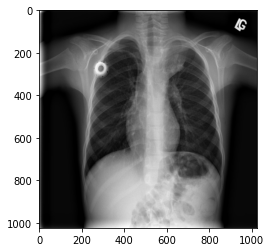

In [2]:
plt.imshow(images[0])
plt.show()

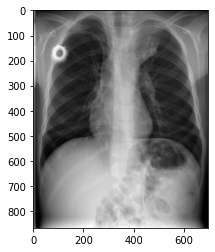

In [3]:
plt.imshow(new_images[0])
plt.show()

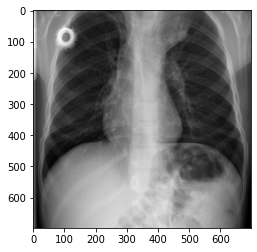

In [4]:
plt.imshow(adjusted_images[0])
plt.show()